In [1]:
import pandas as pd
import numpy as np
import json
import itertools
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Authentication with Spotify

In [81]:
# Authorization Code Flow
# I need the user-top-read authentication to get my users top tracks 
SCOPE = 'user-top-read'
CLIENT_ID = "CLIENT_ID"
CLIENT_SECRET = "CLIENT_SECRET"
REDIRECT_URI = "IP"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=SCOPE, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI))

# API call

In [68]:
# Get my top tracks
# we do all the ranges ("long_term" "medium_term", "short_term") to get most of the tracks since we can only get 50 tracks at a time.
# I also exploit a bug where offsetting 49 can get you 49 more tracks, per range!
# I also assume they arrive in the correct chronological order, so most popular on top and least popular on bottom.

tt_long_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='long_term')
tt_long_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='long_term')

tt_medium_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='medium_term')
tt_medium_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='medium_term')

tt_short_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='short_term')
tt_short_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='short_term')

In [69]:
#check that all responses have 50 items in them
print(len(tt_long_first["items"]))
print(len(tt_long_second["items"]))
print(len(tt_medium_first["items"]))
print(len(tt_medium_second["items"]))
print(len(tt_short_first["items"]))
print(len(tt_short_second["items"]))

50
50
50
50
50
50


# Make dataframes

In [70]:
# combine ranges and go through all long_term tracks, filter and track name, id and range to dataframe 

tt_longs = [tt_long_first, tt_long_second]
df_long_comb = pd.DataFrame()

for tt_long in tt_longs:  
    # add to dataframe
    df_long = pd.DataFrame(tt_long["items"])
    
    # filter away everything exept track name and track id
    df_long_filtered = df_long.filter(["id", "name"])
    
    # add coulumn with the range
    df_long_filtered["range"] = "long_term"
    
    # add to final df
    df_long_comb = pd.concat([df_long_comb, df_long_filtered], ignore_index=True)
  
# print stuff
df_long_comb

,id,name,range
0,2E638Wy85ULliAXTQEFET0,The Border,long_term
1,6ZHaA7gE78xjsJ9MZCBw8x,Awake,long_term
2,0uoHVRsDwVHtzYLMvRkxtC,Automatic,long_term
3,2Ghp894n1laIf2w98VeAOJ,How Do I Make You Love Me?,long_term
4,6kWzCCAghrDeVFZSKgYVGL,"Mass in B Minor, BWV 232: Kyrie: Kyrie eleison...",long_term
...,...,...,...
95,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term
96,6EPRKhUOdiFSQwGBRBbvsZ,Ace of Spades,long_term
97,4Jj8pWRyVjh0KIJLrcreRa,Here We Go Jack,long_term
98,3v9g8iM3v5irWQHqFWaDSo,Cómo Te Quiero,long_term


In [71]:
# go through all medium_term tracks, filter and track name, id and range to dataframe

df_medium_comb = pd.DataFrame()
tt_mediums = [tt_medium_first, tt_medium_second]

for tt_medium in tt_mediums:  
    # add to dataframe
    df_medium = pd.DataFrame(tt_medium["items"])
    
    # filter away everything exept track name and track id
    df_medium_filtered = df_medium.filter(["id", "name"])
    
    # add coulumn with the range
    df_medium_filtered["range"] = "medium_term"
    
    # add to final df
    df_medium_comb = pd.concat([df_medium_comb, df_medium_filtered], ignore_index=True)

# print
df_medium_comb

,id,name,range
0,6X5zsgjDlssIkv0sVYZgx1,Tattoo,medium_term
1,7j43FohbLVulScL7S9sQZk,Ausländer,medium_term
2,1a8JpAL3vbAdXYrEABvOtb,Amerika,medium_term
3,6mcfZIZhkEmNkh2ezmecvb,Desire,medium_term
4,2bPGTMB5sFfFYQ2YvSmup0,Deutschland,medium_term
...,...,...,...
95,2ksuEhOThAcdRYxMCKVDI6,"Jesus bleibet meine Freude, BWV 147/6 (Cantata...",medium_term
96,39REtYE2JZXm9Bmo8JJrrV,I Do It for Your Love,medium_term
97,3d3k8g4GTVx9EFIFlOZOEX,Zeig dich,medium_term
98,3lApcJC16V67JIJE7CCfth,Too Many People - 2012 Remaster,medium_term


In [72]:
# go through all short_term tracks, filter and track name, id and range to dataframe

df_short_comb = pd.DataFrame()
tt_shorts = [tt_short_first, tt_short_second]

for tt_short in tt_shorts:  
    # add to dataframe
    df_short = pd.DataFrame(tt_short["items"])
    
    # filter away everything exept track name and track id
    df_short_filtered = df_short.filter(["id", "name"])
    
    # add coulumn with the range
    df_short_filtered["range"] = "short_term"
    
    # add to final df
    df_short_comb = pd.concat([df_short_comb, df_short_filtered], ignore_index=True)
    
# print
df_short_comb

,id,name,range
0,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term
1,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term
2,7cfH4PBHP8bNKpfmIrXgLD,"The Original Theme from ""Blade"" - 2016 Remaster",short_term
3,1wQL1hqKJNlOZr5vVgIytr,Bennington (2007),short_term
4,0fsRZR40GASck3rxMJerWT,Surface Pan,short_term
...,...,...,...
95,2EFuKYBalAcplMyUVL3BDH,Maria También,short_term
96,2SHfsvx6kgQnbWD1us8RGp,A Hero's Death - Soulwax Remix,short_term
97,2TdpGmTV28dk9XPJhHq1h1,Yere faga,short_term
98,2egYFLjRGuzt8lYM1Yznz2,"Schwanengesang, D. 957: IV. Ständchen",short_term


# Add preferance rating to tracks

In [73]:
# add preferance ratings values to each track in the dataframes. 
# I interprate tracks at the top of the dataframe are more popular than bottom track.
# I interpolate between

# For long_term, I spread from 10 to 4.
# for medium_term, I spread from 8 to 2.
# for short_term, I spread from 6 to 0. 

# long term
# add rating column with NaNs
df_long_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_long_comb.loc[df_long_comb.index[0], 'rating'] = 10
df_long_comb.loc[df_long_comb.index[-1], 'rating'] = 4

# linear interpolate from 10 to 0 through all tracks. 
df_long_comb["rating"] = df_long_comb["rating"].interpolate(method='linear')

#print to see.
df_long_comb

,id,name,range,rating
0,2E638Wy85ULliAXTQEFET0,The Border,long_term,10.000000
1,6ZHaA7gE78xjsJ9MZCBw8x,Awake,long_term,9.939394
2,0uoHVRsDwVHtzYLMvRkxtC,Automatic,long_term,9.878788
3,2Ghp894n1laIf2w98VeAOJ,How Do I Make You Love Me?,long_term,9.818182
4,6kWzCCAghrDeVFZSKgYVGL,"Mass in B Minor, BWV 232: Kyrie: Kyrie eleison...",long_term,9.757576
...,...,...,...,...
95,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,4.242424
96,6EPRKhUOdiFSQwGBRBbvsZ,Ace of Spades,long_term,4.181818
97,4Jj8pWRyVjh0KIJLrcreRa,Here We Go Jack,long_term,4.121212
98,3v9g8iM3v5irWQHqFWaDSo,Cómo Te Quiero,long_term,4.060606


In [74]:
# medium term
# for medium_term, I spread from 8 to 2.

# add rating column with NaNs
df_medium_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_medium_comb.loc[df_medium_comb.index[0], 'rating'] = 8
df_medium_comb.loc[df_medium_comb.index[-1], 'rating'] = 2

# linear interpolate from 10 to 0 through all tracks. 
df_medium_comb["rating"] = df_medium_comb["rating"].interpolate(method='linear')

#print to see.
df_medium_comb

,id,name,range,rating
0,6X5zsgjDlssIkv0sVYZgx1,Tattoo,medium_term,8.000000
1,7j43FohbLVulScL7S9sQZk,Ausländer,medium_term,7.939394
2,1a8JpAL3vbAdXYrEABvOtb,Amerika,medium_term,7.878788
3,6mcfZIZhkEmNkh2ezmecvb,Desire,medium_term,7.818182
4,2bPGTMB5sFfFYQ2YvSmup0,Deutschland,medium_term,7.757576
...,...,...,...,...
95,2ksuEhOThAcdRYxMCKVDI6,"Jesus bleibet meine Freude, BWV 147/6 (Cantata...",medium_term,2.242424
96,39REtYE2JZXm9Bmo8JJrrV,I Do It for Your Love,medium_term,2.181818
97,3d3k8g4GTVx9EFIFlOZOEX,Zeig dich,medium_term,2.121212
98,3lApcJC16V67JIJE7CCfth,Too Many People - 2012 Remaster,medium_term,2.060606


In [75]:
# short term
# for short_term, I spread from 6 to 4.

# add rating column with NaNs
df_short_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_short_comb.loc[df_short_comb.index[0], 'rating'] = 6
df_short_comb.loc[df_short_comb.index[-1], 'rating'] = 0

# linear interpolate from 10 to 0 through all tracks. 
df_short_comb["rating"] = df_short_comb["rating"].interpolate(method='linear')

#print to see.
df_short_comb

,id,name,range,rating
0,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term,6.000000
1,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term,5.939394
2,7cfH4PBHP8bNKpfmIrXgLD,"The Original Theme from ""Blade"" - 2016 Remaster",short_term,5.878788
3,1wQL1hqKJNlOZr5vVgIytr,Bennington (2007),short_term,5.818182
4,0fsRZR40GASck3rxMJerWT,Surface Pan,short_term,5.757576
...,...,...,...,...
95,2EFuKYBalAcplMyUVL3BDH,Maria También,short_term,0.242424
96,2SHfsvx6kgQnbWD1us8RGp,A Hero's Death - Soulwax Remix,short_term,0.181818
97,2TdpGmTV28dk9XPJhHq1h1,Yere faga,short_term,0.121212
98,2egYFLjRGuzt8lYM1Yznz2,"Schwanengesang, D. 957: IV. Ständchen",short_term,0.060606


# Combine dataframes and remove duplicates

In [76]:
# combine all
df_toptracks = pd.concat([df_short_comb, df_medium_comb, df_long_comb], ignore_index=True)
df_toptracks

,id,name,range,rating
0,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term,6.000000
1,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term,5.939394
2,7cfH4PBHP8bNKpfmIrXgLD,"The Original Theme from ""Blade"" - 2016 Remaster",short_term,5.878788
3,1wQL1hqKJNlOZr5vVgIytr,Bennington (2007),short_term,5.818182
4,0fsRZR40GASck3rxMJerWT,Surface Pan,short_term,5.757576
...,...,...,...,...
295,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,4.242424
296,6EPRKhUOdiFSQwGBRBbvsZ,Ace of Spades,long_term,4.181818
297,4Jj8pWRyVjh0KIJLrcreRa,Here We Go Jack,long_term,4.121212
298,3v9g8iM3v5irWQHqFWaDSo,Cómo Te Quiero,long_term,4.060606


In [77]:
# remove duplicates based on track id
id_list = list(df_toptracks["id"])

# finds and returns the index of duplicates that need to be removed
# IMPORTANT. I go backwards because the "long_term" tracks are at the bottom/end of the dataframe.
# I want to keep all my "long_term" tracks and rather remove duplicates in medium and short term.

duplicates_indices = [idx for idx in range(len(id_list)-1, -1, -1) if id_list[idx] in id_list[idx+1:]]
print("duplicate rows and need to be deleted:", duplicates_indices)

# remove duplicate rows/tracks from dataframe
df_toptracks = df_toptracks.drop(index=duplicates_indices, axis=0)

df_toptracks

duplicate rows and need to be deleted: [249, 195, 185, 172, 169, 163, 151, 149, 147, 141, 133, 128, 119, 113, 105, 104, 103, 102, 101, 100, 96, 95, 90, 85, 84, 79, 77, 70, 66, 62, 61, 60, 53, 50, 49, 48, 45, 42, 40, 33, 28, 27, 26, 24, 23, 22, 20, 16, 15, 14, 13, 11, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


,id,name,range,rating
10,7L5IwfKB6W0tadcSh9wlyH,Ouverture,short_term,5.393939
12,0tAZi3X7dUdd7m8OXB8pMA,Shadow,short_term,5.272727
17,1XMDIKQbV30WJPKLMN6MKv,INSTRUCTION,short_term,4.969697
18,1XZdwzd8DTDvkjVc0eJ9BI,Wildlife Analysis,short_term,4.909091
19,1f4cKwcKfNiLbQr8x2tZ3C,Melt!,short_term,4.848485
...,...,...,...,...
295,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,4.242424
296,6EPRKhUOdiFSQwGBRBbvsZ,Ace of Spades,long_term,4.181818
297,4Jj8pWRyVjh0KIJLrcreRa,Here We Go Jack,long_term,4.121212
298,3v9g8iM3v5irWQHqFWaDSo,Cómo Te Quiero,long_term,4.060606


# Ratings distribution plot

<AxesSubplot:title={'center':'Rating distribution'}, ylabel='Frequency'>

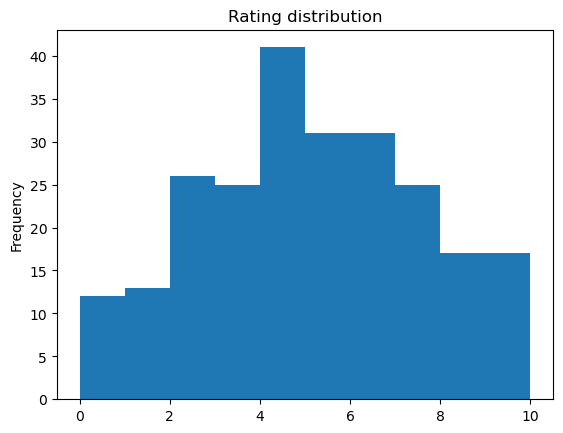

In [78]:
# Kind of a bell curve structure, which is good. Also, normal that more tracks with higher ratings. 
# Otherwise, they would not be top tracks.
df_toptracks["rating"].plot(title="Rating distribution", kind='hist', bins=10)

# Save to disk

In [80]:
# add to csv
df_toptracks.to_csv("./dataset/toptracks_ratings.csv", index=False)